In [2]:
from preprocessing.rss_parser import RSSParser
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
parser = RSSParser("data/misc/episodes.rss")()

/home/biagio/.local/share/virtualenvs/filmbaradatok-El16Q7PP/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [4]:
ep_df = pd.DataFrame.from_dict(parser.episodes_dict, orient="index")
ep_df.reset_index(inplace=True)
ep_df.rename(columns={"index": "filename"}, inplace=True)
ep_df = ep_df[ep_df["filename"].apply(lambda x: isinstance(x, int))]
ep_df.head()

,filename,title,pubdate,description,link,download
2,241,Filmbarátok Podcast #241,2022-10-13 16:00:36,Filmbarátok Podcast #241 (Október 2022) 228 pe...,,https://feeds.soundcloud.com/stream/1362161197...
4,240,Filmbarátok Podcast #240,2022-09-28 16:00:22,Filmbarátok Podcast #240 (Szeptember 2022) 249...,,https://feeds.soundcloud.com/stream/1352656063...
5,239,Filmbarátok Podcast #239,2022-09-15 16:30:04,Filmbarátok Podcast #239 (Szeptember 2022) 259...,,https://feeds.soundcloud.com/stream/1344278821...
7,238,Filmbarátok Podcast #238,2022-08-30 11:22:51,Filmbarátok Podcast #238 (Augusztus 2022) 225 ...,,https://feeds.soundcloud.com/stream/1333971847...
11,237,Filmbarátok Podcast #237,2022-08-13 05:41:45,Filmbarátok Podcast #237 (Augusztus 2022) 246 ...,,https://feeds.soundcloud.com/stream/1323359386...


In [5]:
num_years = ep_df["pubdate"].apply(lambda x: x.year).nunique()
min_year = ep_df["pubdate"].apply(lambda x: x.year).min()
max_year = ep_df["pubdate"].apply(lambda x: x.year).max()

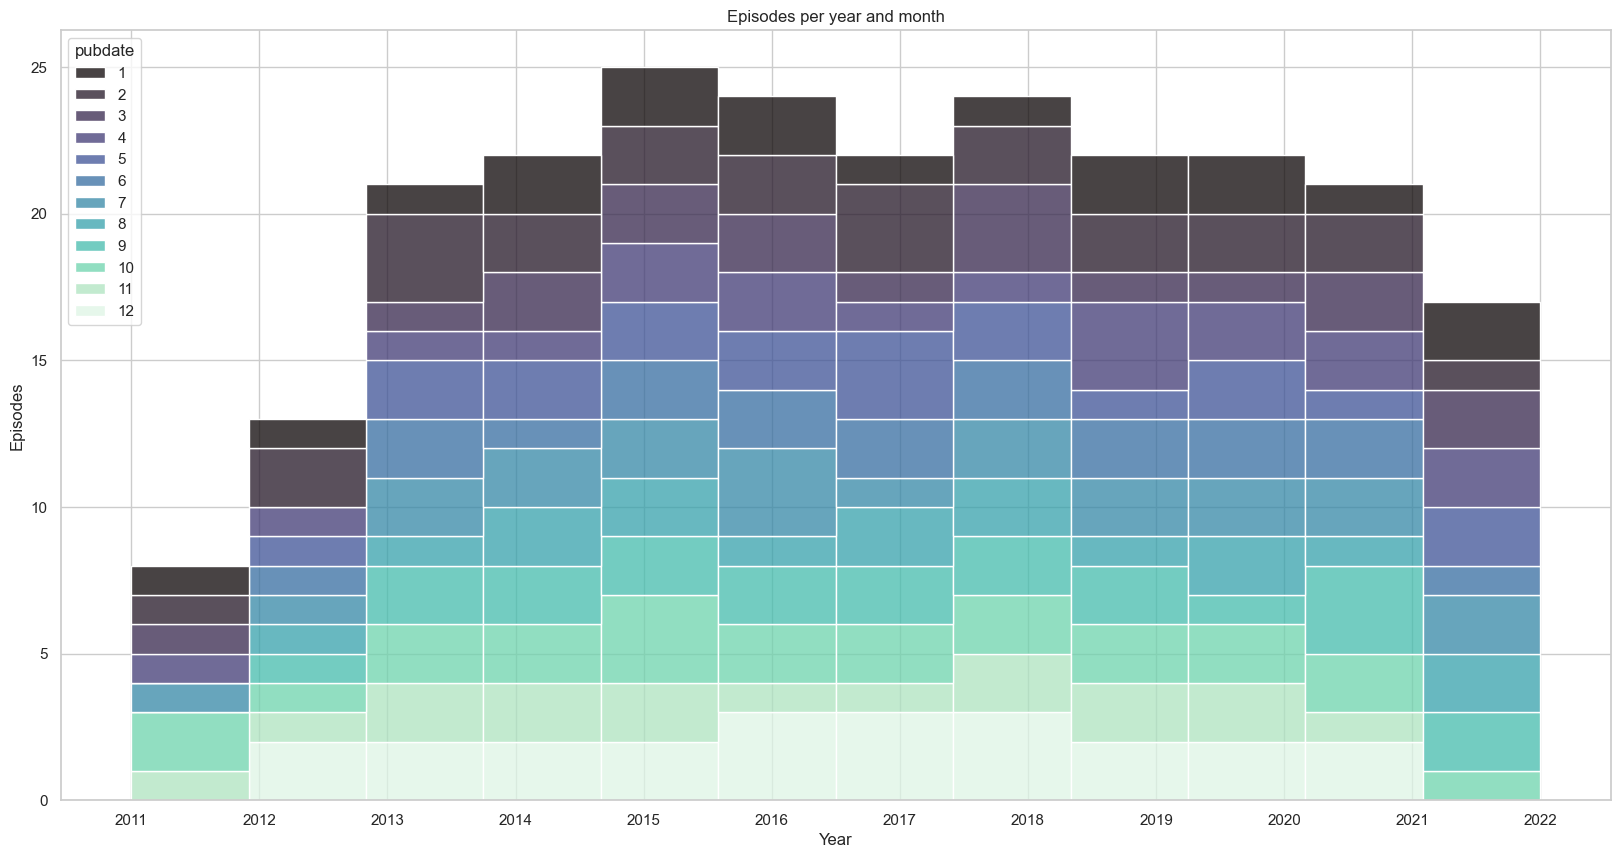

In [7]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Episodes per year and month")
ax.set_xlabel("Year")
ax.set_ylabel("Episodes")
ax.set_xticks(range(min_year, max_year + 1))
sns.histplot(
    data=ep_df,
    x=ep_df["pubdate"].apply(lambda x: x.year),
    hue=ep_df["pubdate"].apply(lambda x: x.month),
    ax=ax,
    multiple="stack",
    palette="mako",
    bins=num_years,
    )

plt.show()